### Data Analysis on Supermarket Sales data using Python

## Introduction

The data set contains sales, profit and geographical information of individual orders. 
Our task is to determine weak areas and opportunities for the Supermarket to boost business growth.

**Business Questions**

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?
- Which City has the Highest Number of Sales?

---

## Preparing the Environment

We will import the required libraries and read in the data set.

- Pandas - Data manipulation
- Matplotlib and Seaborn - Data visualisation

In [1]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read in data in CSV format
storesales = pd.read_csv('/Users/mihai/storesales.csv')

---
## Data Exploration

Let's have a look at the data using df.head(), df.tail() function, df.shape() and df.info()

In [3]:
# Preview first 5 rows of data set
storesales.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Preview last 5 rows of data set
storesales.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# Shape of data set
storesales.shape

(9994, 13)

In [6]:
# Summarised information of data set
storesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are 9,994 rows including header and 13 columns. Data type is correct and matches the corresponding values. 

---

## Data Cleaning

Before we start with the analysis, we will clean the missing and duplicate data.

**Handling Missing Values**

Next we will find out whether there is Null values.

In [7]:
# Find the number of null values for all columns
storesales.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The result shows that the data set does not have any null value.

**Duplicate Data**

Then, we will find out whether there is duplicate data.

In [8]:
# Find the number of duplicate data
storesales.duplicated().sum()

17

So, there are 17 duplicated rows. Let's run another function to view the duplicated data.

In [9]:
# Show the duplicated rows
storesales[storesales.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [10]:
# Drop the duplicated rows
storesales.drop_duplicates(inplace = True)

In [11]:
# Find the no. of rows and columns
storesales.shape

(9977, 13)

We can confirm that the duplicated rows have been dropped as now there are 9977 rows.

**Calculated Field**

Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [12]:
storesales['Profit Margin %'] = (storesales.Profit / storesales.Sales) * 100
storesales.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


---

## Descriptive Statistics

Now we will perform a descriptive statistical analysis. By using df.describe() with the argument include='all', we ensure that both numerical and categorical features are included in the output.


In [13]:
# Get descriptive statistics summary
storesales.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


You may notice 'NaN' values in some of the categorical columns, which is completely normal. Since categorical values don't require calculations, these can be safely ignored.

Our focus should be on the unique counts and frequencies of the categorical features, such as:

- There are 4 shipping modes and 3 customer segments. Almost half of the orders come from the Consumer segment, using Standard Class shipping.
- The store offers 3 product categories with 17 sub-categories. 60% of orders are for Office Supplies, with at least 15% of purchases being Binders.

Regarding numerical parameters, some noteworthy points include:

- 75% of orders generate at least a 36% profit margin.
- Loss-making orders can result in up to 275% losses, which highlights the need to address these negative sales.

We will conduct further analysis below to validate these observations.

---

## Exploratory Data Analysis

### 1. Which Category is Best Selling and Most Profitable?

"Best Selling" refers to analyzing sales, while "Most Profitable" focuses on profit. To examine these, we will group the Sales, Profit, and Quantity by Category, and then use the df.groupby().sum() function followed by pd.DataFrame() to summarize the data.

In [14]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(storesales.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


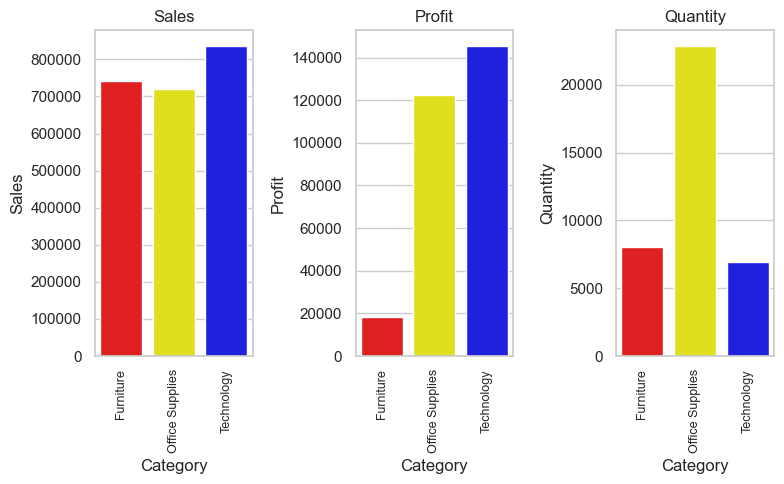

In [15]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Define custom colors for the bars (categories)
custom_colors = ["red", "yellow", "blue"] 

# Plot barplots with custom bar colors
cat1 = sns.barplot(
    x=category_analysis.index,
    y=category_analysis["Sales"],
    ax=axis[0],
    palette=custom_colors,
)
cat2 = sns.barplot(
    x=category_analysis.index,
    y=category_analysis["Profit"],
    ax=axis[1],
    palette=custom_colors,
)
cat3 = sns.barplot(
    x=category_analysis.index,
    y=category_analysis["Quantity"],
    ax=axis[2],
    palette=custom_colors,
)

# Set spacing between subplots
figure.tight_layout()

Here are our key observations:

- All three categories—Furniture, Office Supplies, and Technology—generate similar sales figures.
- Technology is the best-selling category and, interestingly, also the most profitable. The relatively low quantity sold makes sense, as these products are typically one-time purchases that last 4-5 years.
- While Furniture generates similar sales to Technology, it is the least profitable, with a minimal quantity sold as well.
- Office Supplies, being more affordable, has the highest quantity sold.

### 2. What are the Best Selling and Most Profitable Sub-Category?

In [16]:
# Group by sub-category
subcat_analysis = pd.DataFrame(storesales.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [17]:
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [18]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


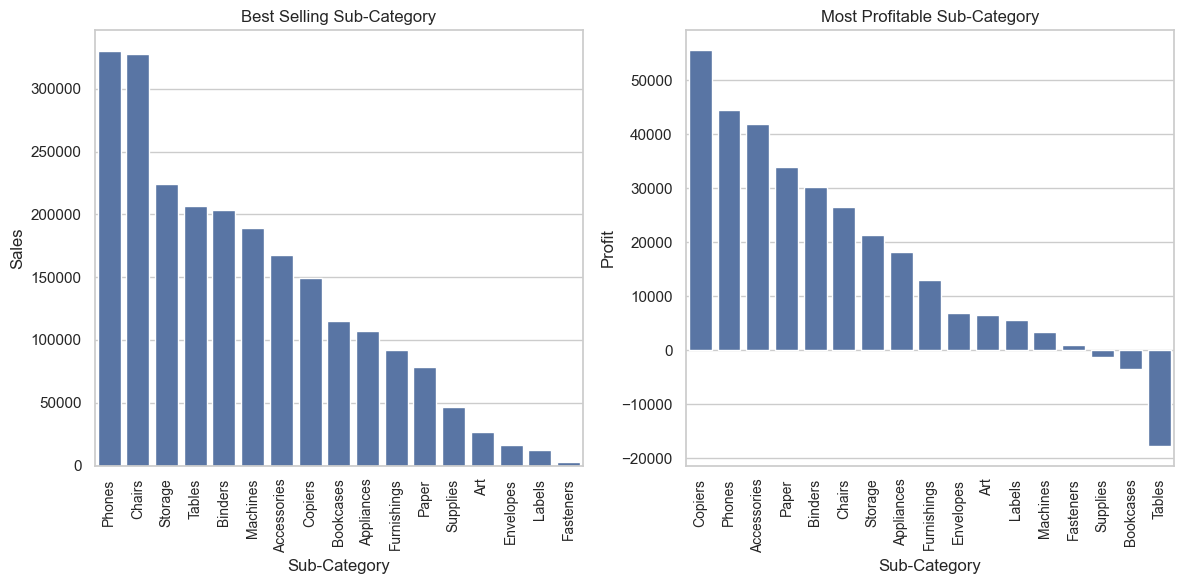

In [26]:
# Plot Bar Plots

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

Let’s analyze the bar plots:

- Phones and Chairs are the top two best-selling sub-categories.
- Copiers generate the most profit, followed by Phones, Accessories, Papers, and Binders. The marketing strategy should focus on promoting these products.
- On the other hand, products like Machines, Fasteners, Supplies, Bookcases, and Tables either break even or result in losses. The Supermarket should consider removing these from the product catalog, raising their sale price to improve profit margins, or negotiating lower prices with suppliers.

### 3. Which is the Top Selling Sub-Category?

In [19]:
subcat_quantity = pd.DataFrame(storesales.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


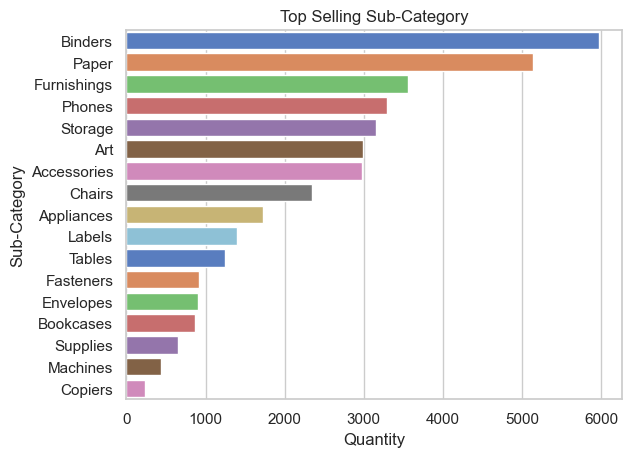

In [20]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

We can conclude that:

- The supermarket should ensure that inventory is consistently well-stocked for the top-selling sub-categories, such as Binders, Paper, Furnishings, and Phones.
- Although Copiers are the most profitable, they sell the least, with only 234 units sold. This is understandable, as Copiers are expensive office equipment that typically have a long lifespan, leading to fewer sales compared to other items.

### 4. Which Customer Segment is Most Profitable?

In [21]:
segment_analysis = pd.DataFrame(storesales.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


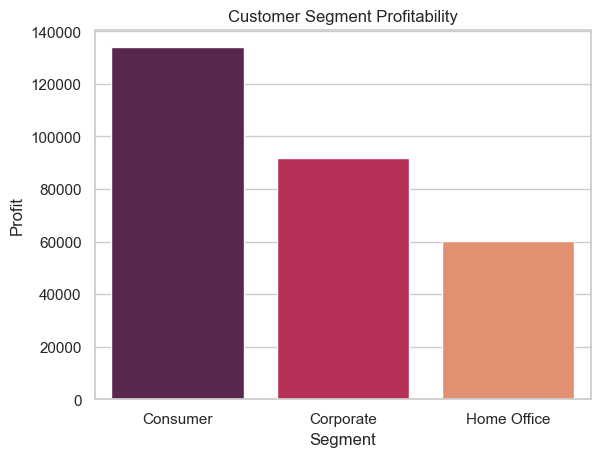

In [22]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

The Consumer segment is the most profitable, followed by the Corporate segment and Home Office. Therefore, the marketing strategy should focus on targeting and retaining customers from the Consumer and Corporate segments.

### 5. Which is the Preferred Ship Mode?

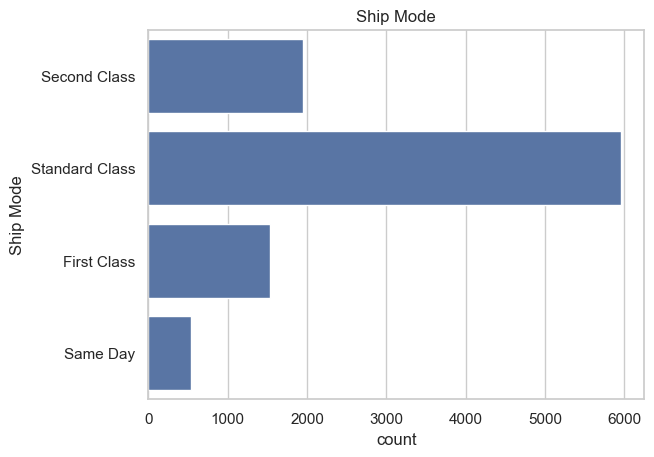

In [23]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(storesales['Ship Mode'])
plt.title("Ship Mode")
plt.show()

By a significant margin, Standard Class is the preferred shipping method, likely due to its cost-effectiveness. The other shipping modes are less popular with customers, possibly because they are more expensive.

### 6. Which Region is the Most Profitable?

In [24]:
region_analysis = pd.DataFrame(storesales.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


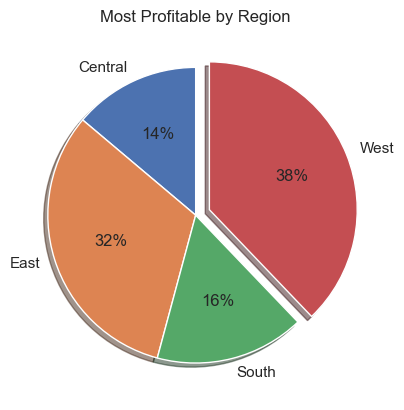

In [25]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

East and West region are most profitable.

### 7. Which City has the Highest Number of Sales?

In [26]:
# Group by 'City' and calculate the sum for 'Sales' and 'Quantity'
city_sales = storesales.groupby('City')[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False)

# Select the top 10 rows
top10 = city_sales[:10]

# Display the result
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [27]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


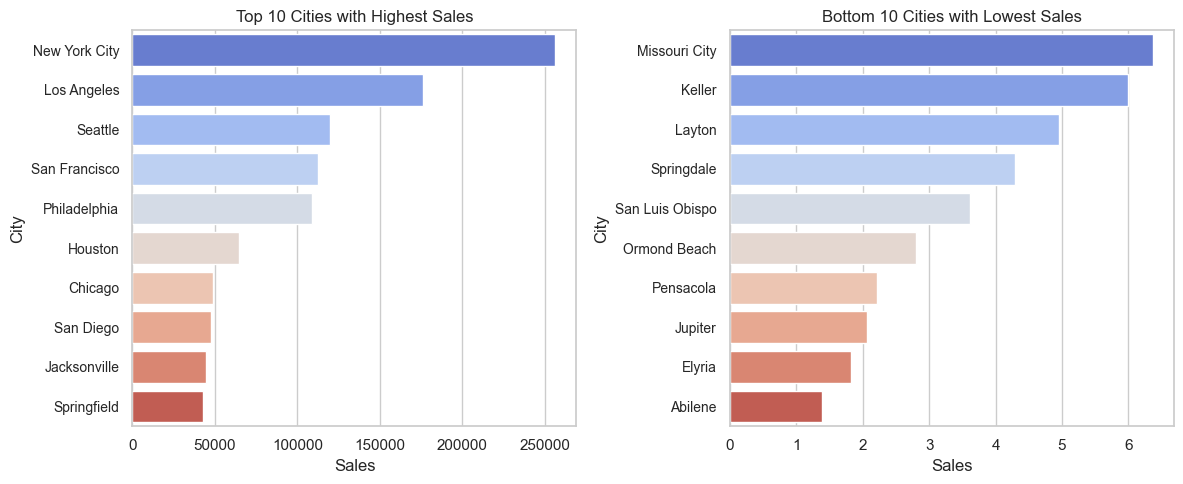

In [28]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

There is a significant gap between the cities with the highest and lowest sales. The marketing strategy should focus on targeting the top 10 cities to boost overall performance.

---